In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords


In [9]:
data = pd.read_csv('C:\Centilever\Sentiment Analysis for movie\IMDB Dataset.csv')

In [10]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [11]:
data['sentiment'].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [12]:
data['review'].value_counts()

review
Such a joyous world has been created for us in Pixar's A Bug's Life; we're immersed in a universe which could only be documented this enjoyably on film, but more precisely a universe which could only be documented through the world of animation. For those who have forgotten what a plentiful and exuberant world animation can offer  when it's in the right hands that is  A Bug's Life is a warm reminder. We walk out of the film with an equally-warm feeling, and a sense of satisfaction derivative of only high-calibre film productions.It is only Pixar's second animated feature. The sub-group of Disney made their spectacular debut and perhaps entirely inadvertent mark on the film world three years prior in 1995, with their landmark movie Toy Story. It was a movie which defied convention, re-invented and breathed new life into animation and defined a whole new level of excellence. Now, they return with their sophomore effort which, to be honest, draws a creeping sense of cynicism in u

In [13]:
data.dropna(inplace=True)

In [14]:
from nltk.corpus import stopwords

def clean_review(text):
    if isinstance(text, str):
        cleaned = ' '.join(word for word in text.split() if word.lower() not in stopwords.words('english'))
        return cleaned
    return ""


In [15]:
data['review'] = data['review'].apply(clean_review)

In [16]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].dropna().astype(str))

In [17]:
#worldcloud
from wordcloud import WordCloud

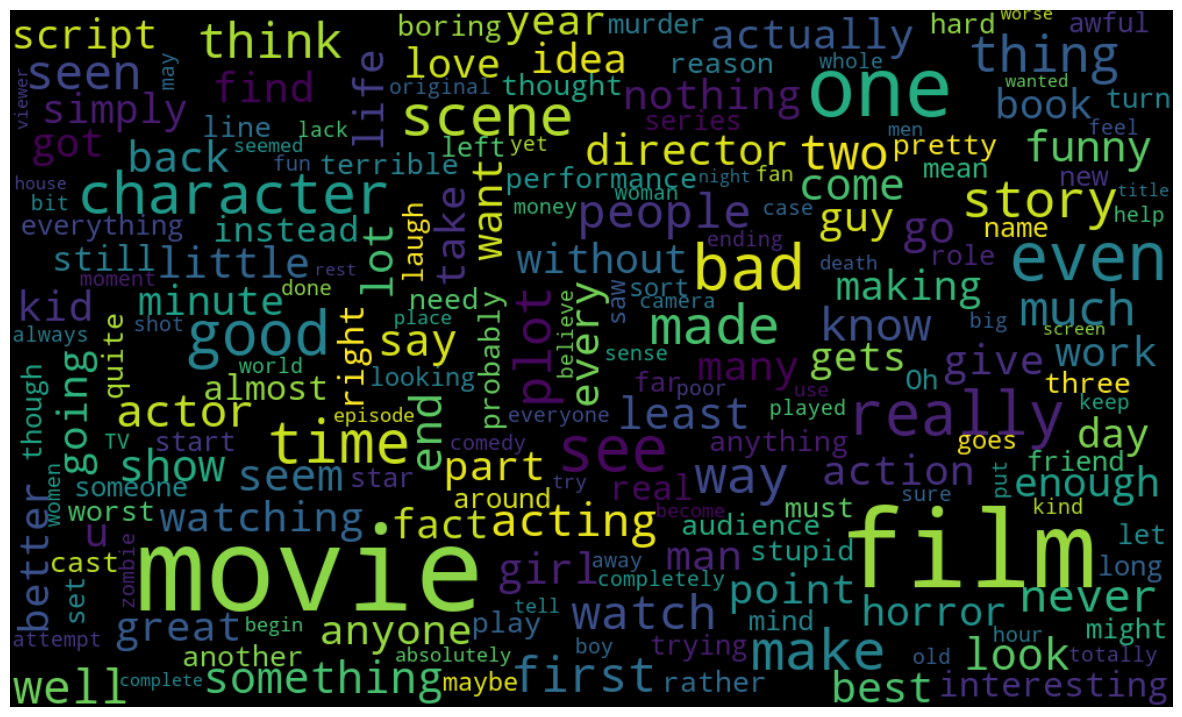

In [18]:
#draw Wordcloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

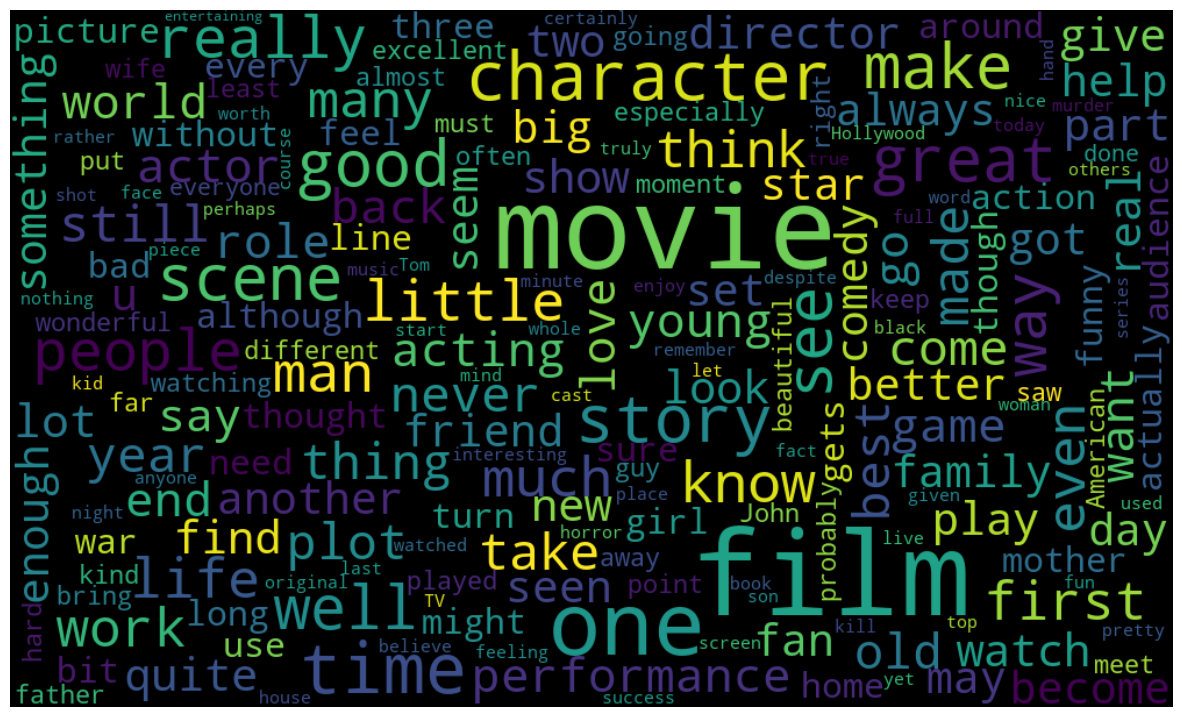

In [19]:
#draw Wordcloud
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [20]:
reviews = cv.fit_transform(data['review']).toarray()

In [21]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\gargi\AppData\Local\Temp\ipykernel_35008\3911524901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])


In [22]:
data['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [26]:
#data spliting
from sklearn.model_selection import train_test_split

In [27]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews,data['sentiment'],test_size=0.2)

In [28]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [29]:
predict = model.predict(reviews_test)

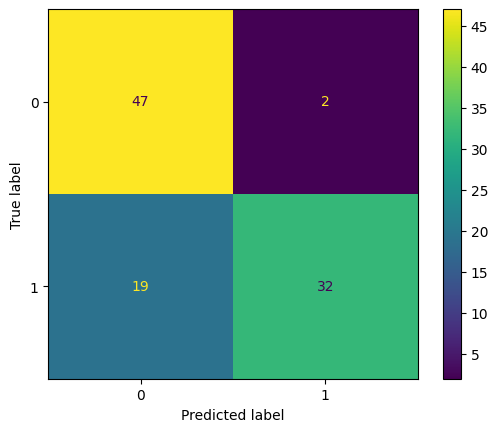

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sent_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

In [31]:
import pickle as pk

In [32]:
pk.dump(model,open('model.pkl','wb'))

In [33]:
pk.dump(cv,open('scaler.pkl','wb'))

In [ ]:
a